In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 
import pickle
from sklearn.preprocessing import OneHotEncoder
from numpy import linalg as LA

In [0]:
trainlabel= pd.read_csv("/content/gdrive/My Drive/ML/HW3/Train_Labels.csv")
vallabel = pd.read_csv("/content/gdrive/My Drive/ML/HW3/Val_Labels.csv")

with open("/content/gdrive/My Drive/ML/HW3/Train_Features.pkl", 'rb') as f:
    train_pickle = pickle.load(f, encoding="latin1")
    train_data = pd.DataFrame(train_pickle).T
with open("/content/gdrive/My Drive/ML/HW3/Test_Features.pkl", 'rb') as f:
    test_pickle = pickle.load(f, encoding="latin1")
    test_data = pd.DataFrame(test_pickle).T
with open("/content/gdrive/My Drive/ML/HW3/Val_Features.pkl", 'rb') as f:
    val_pickle = pickle.load(f, encoding="latin1")
    val_data = pd.DataFrame(val_pickle).T
train_data.index.name = 'Id'
train_data.reset_index(inplace=True)
test_data.index.name = 'Id'
test_data.reset_index(inplace=True)
val_data.index.name = 'Id'
val_data.reset_index(inplace=True)
train = pd.merge(train_data,trainlabel,left_on = 'Id',right_on = 'Id', how = 'inner')
test = pd.merge(test_data,trainlabel,left_on = 'Id',right_on = 'Id', how = 'inner')
val = pd.merge(val_data,vallabel,left_on = 'Id',right_on = 'Id', how = 'inner')
valuetest = test_data.iloc[:,1]
train_full =train
val_full =val
test_full = test

In [0]:
test_data_1=test_data.iloc[:,1:]

In [0]:
columns = ['Category', 'Id']
train_full_data = train_full.drop(columns, axis=1)
val_full_data = val_full.drop(columns,axis=1)
train_label = train[['Category']]
val_label = val[['Category']]
columns1 = ['Id']
train_full = train_full.drop(columns1,axis=1)
testdata  = test_full.drop(columns, axis=1)


In [147]:
test_data.shape

(2000, 513)

In [0]:
train_norm = LA.norm(np.transpose(train_full_data), 1)
train_full_data_norm = np.transpose(train_full_data)/train_norm
val_norm = LA.norm(np.transpose(val_full_data), 1)
val_full_data_norm = np.transpose(val_full_data)/val_norm
test_norm = LA.norm(np.transpose(testdata), 1)
test_full_data_norm = np.transpose(testdata)/test_norm
test_norm1 = LA.norm(np.transpose(test_data_1), 1)
test_full_data_norm = np.transpose(test_data_1)/test_norm1


In [0]:
onehotencoder = OneHotEncoder(categorical_features = [0]) 
train_label_encoded = onehotencoder.fit_transform(train_label).toarray()
train_label_dataframe = pd.DataFrame(train_label_encoded) 
train_label_dataframe

In [0]:
import numpy as np
import math
from random import randrange

def Derivative(X,Y,wtrans,batchvalue):
  (d,N) = X.shape
  X2 = np.ones(N)
  Xbar = np.vstack([X,X2])
  Xbartran = np.transpose(Xbar)
  i = 0
  val = 0
  pr=[]
  if(wtrans is None):
    wtrans = np.ones([3,d+1])
  for i in batchvalue:
    #rav gets a column of X values with d dimnensions
    rav=Xbar[...,i].ravel()
    lis2 = []
    #pr is thetha values * the X value of 1 with d dimensions
    pr=wtrans.dot(rav)
    Y_value =Y[i][0:3]
    lis2.append(sigmoid(pr[0],pr))
    lis2.append(sigmoid(pr[1],pr))
    lis2.append(sigmoid(pr[2],pr))
    som = np.subtract(Y_value,lis2)
    sigarray = np.array(som)[np.newaxis]
    Xvalue = np.array(rav)[np.newaxis]
    val = val+ (np.transpose(sigarray)).dot(Xvalue)
  val = 0-((1/16.0)*val)
  return val

#This Function is to create the Batch in the Stochastic Gradient of batch m
def batch(N,m):
  x = np.random.rand(0,N)
  list1 = []
  biglist = []
  lis1 = []
  u =0
  for i in range(0,N):
    lis1.append(randrange(N))
    u = u+1
    if(u==m):
      biglist.append(lis1)
      lis1 = []
      u=0
  biglist.append(lis1)
  return biglist

#This sigmoid Function is used to for k-1 coefficients
def sigmoid(e,z):
  e_z = np.exp(z - np.max(z)) 
  return (e /(1+ e_z.sum(axis=0)))

#This sigmoid Function is used to for k coefficients
def sigmoid_kvalue(z):
  e_z = np.exp(z - np.max(z)) 
  return (1 /(1+ e_z.sum(axis=0)))

def prob(wtrans,Xbar):
  val = max(wtrans).dot(Xbar)
  return val

def LossFunction(wtrans,X,Y):
  (d,N) = X.shape
  X2 = np.ones(N)
  Xbar = np.vstack([X,X2])
  for i in range(N):
    rav=Xbar[...,i].ravel()
    value = 0
    lval= []
    for j in range(3):
      expval = np.log(1 + np.sum(np.exp(sigmoid(wtrans.dot(rav),wtrans.dot(rav)))))
      sumval = sigmoid(wtrans[j].dot(rav),wtrans.dot(rav)) - expval
      value =  value+ sumval
  finalvalue = 0-value*(1/N)
  print(finalvalue)
  return finalvalue
    
def Log(X,Y,m,n0,n1,max_epoch,delta):
  wtrans=None
  Loss = None
  lval = []
  for epoch in range(max_epoch):
    (k,N) = X.shape
    batchvalue = batch(N,m)
    n = n0/(n1+epoch)
    for i in range(len(batchvalue)):
      if(wtrans is None):
        wtrans  = Derivative(X,Y,wtrans,batchvalue[i])
      else:
        wtrans = np.subtract(wtrans, n*Derivative(X,Y,wtrans,batchvalue[i]))
    if(Loss is None):
      Loss =  LossFunction(wtrans,X,Y)
      lval.append((epoch,Loss))
    else:
      if(LossFunction(wtrans,X,Y)>(1-delta)*Loss):
        lval.append((epoch,(1-epoch**0.1)*Loss))
        continue
      else:
        lval.append((i,Loss))
        Loss =  LossFunction(wtrans,X,Y)
        
  return (wtrans,lval)



In [0]:
def LogisticRegression(Xtest,X,Y,m,n0,n1,max_epoch,delta):
  (d,N) = Xtest.shape
  X2 = np.ones(N)

  Xbar = np.vstack((Xtest,X2))
  Xbartran = np.transpose(Xbar)
  wtrans,lval = Log(X,Y,m,n0,n1,max_epoch,delta)
  Z=[]
  for i in range(N):
    Xval=Xbar[...,i].ravel()
    Xarrayvalue = np.array(Xval)[np.newaxis]
    Value = wtrans.dot(np.transpose(Xarrayvalue))
    y=[]
    for j in range(3):
      y.append(sigmoid(Value[j],Value))
    y.append(sigmoid_kvalue(Value))
    Z.append(y)
  return (Z,lval)

m =8
n0 = 0.1
n1 = 1
delta = 1
max_epoch = 10

xy,lval11 = LogisticRegression(test_full_data_norm,train_full_data_norm,train_label_dataframe.values,m,n0,n1,max_epoch,delta)


Text(0, 0.5, 'L(theta)')

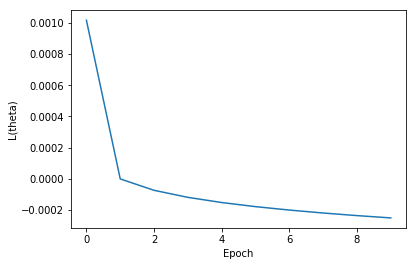

In [169]:
value=lval11
pddat=pd.DataFrame(value, columns=['epoch','thetaval'])
plt.plot(pddat['epoch'],pddat['thetaval'])
plt.xlabel('Epoch')
plt.ylabel('Loss Function')

For the above values mentioned I have got the following graph.
Number of epoch - **8**
Loss Function - **0.0009997871619652104**


In [0]:
m =16
n0 = 0.01
n1 = 0.1
delta = 0.00001
max_epoch = 10

x1,lval2 = LogisticRegression(test_full_data_norm,train_full_data_norm,train_label_dataframe.values,m,n0,n1,max_epoch,delta)


Text(0, 0.5, 'L(theta)')

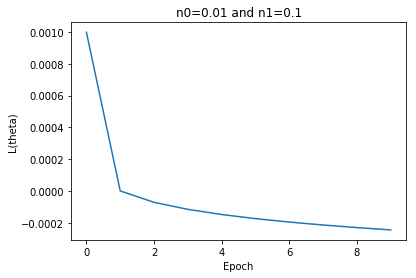

In [160]:
lval2=pd.DataFrame(lval2, columns=['epoch','thetaval'])
plt.plot(lval2['epoch'],lval2['thetaval'])
plt.title('n0=0.01 and n1=0.1')
plt.xlabel('Epoch')
plt.ylabel('Loss Function')

For values  n0 - 0.01 and n1 = 0.1
Epoch - 8
Loss Function value - 0.0009998314425902813


**For 2.2.3 **


In [0]:

Out,plot1=LogisticRegression(test_full_data_norm,train_full_data_norm,train_label_dataframe.values,16,0.1,1,20,4)
plot_dt=pd.DataFrame(plot1, columns=['epoch','thetaval'])


In [0]:
Out1,plotval=LogisticRegression(val_full_data_norm,train_full_data_norm,train_label_dataframe.values,16,0.1,1,20,4)
plot_val=pd.DataFrame(plotval, columns=['epoch','thetaval'])


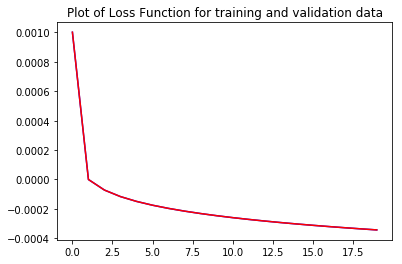

In [200]:
plt.plot(plot_val['epoch'], plot_dt['thetaval'], 'b')
plt.plot(plot_dt['epoch'], plot_dt['thetaval'], 'r')
plt.title('Plot of Loss Function for training and validation data')
plt.show()

In [0]:
Loss Function as a function of Epoch. Graph for validation and training data.

In [0]:
Frame = pd.DataFrame(x,columns=['1','2','3','4'],dtype = float)
xy = Frame.idxmax(axis = 1)
Frame
datafr = pd.DataFrame({'Id': test_data['Id'],'Category': Frame.idxmax(axis = 1)})
datafr.to_csv('sub1.csv', header=False, index=False) 